## Dimensionality Reduction

https://www.kaggle.com/lodetomasi1995/income-classification

Listing of attributes:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

## Utilities

In [2]:
# Describe data
def describe_dataframe(df=pd.DataFrame()):
    """
    This function generates descriptive stats of a dataframe
    Args:
        df (dataframe): the dataframe to be analyzed
    Return:
        None
    """
    
    print("\n\n")
    print("*" * 30)
    print("About the Data")
    print("*" * 30)
    
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])
    print("\n")
    
    print("Column Names:", df.columns.values)
    print("\n")
    
    print("Column Data Types:\n", df.dtypes)
    print("\n")
    
    print("Columns with Missing Values:", 
          df.columns[df.isnull().any()].tolist())
    print("\n")
    
    print("Number of rows with Missing Values:", np.count_nonzero(df.isnull()))
    print("\n")
          
    print("General Stats:")
    print(df.info())
    print("\n")
    
    print("Summary Stats:")
    print(df.describe())
    print("\n")
    
    print("Sample Rows:")
    print(df.head())

## Data preprocessing

In [3]:
# Importing the dataset
dataset = pd.read_csv('income_evaluation.csv')

# Moving from "?" to NAN
dataset = dataset.replace(' ?', np.nan)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Describe data
describe_dataframe(dataset)

# Imputing missing data
dataset = dataset.fillna(" Unknown")

# Check data
describe_dataframe(dataset)




******************************
About the Data
******************************
Number of rows: 32561
Number of columns: 15


Column Names: ['age' 'workclass' 'fnlwgt' 'education' 'education-num' 'marital-status'
 'occupation' 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country' 'income']


Column Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


Columns with Missing Values: ['workclass', 'occupation', 'native-country']


Number of rows with Missing Values: 4262


General Stats:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age          

## Data Summarization

In [5]:
print("Native Country:\n")
print(dataset['native-country'].value_counts())
print("\n")

print("Workclass:\n")
print(dataset['workclass'].value_counts())
print("\n")

print("Education:\n")
print(dataset['education'].value_counts())
print("\n")

Native Country:

 United-States                 29170
 Mexico                          643
 Unknown                         583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                

## Data Visualizing

In [6]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'small',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}

plt.rcParams.update(params)

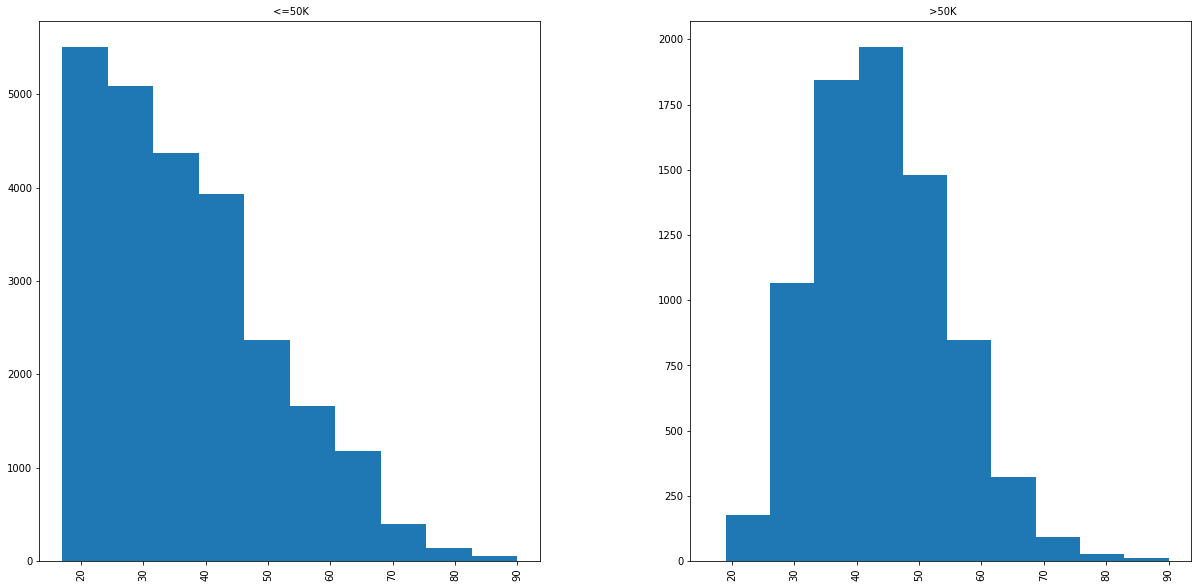

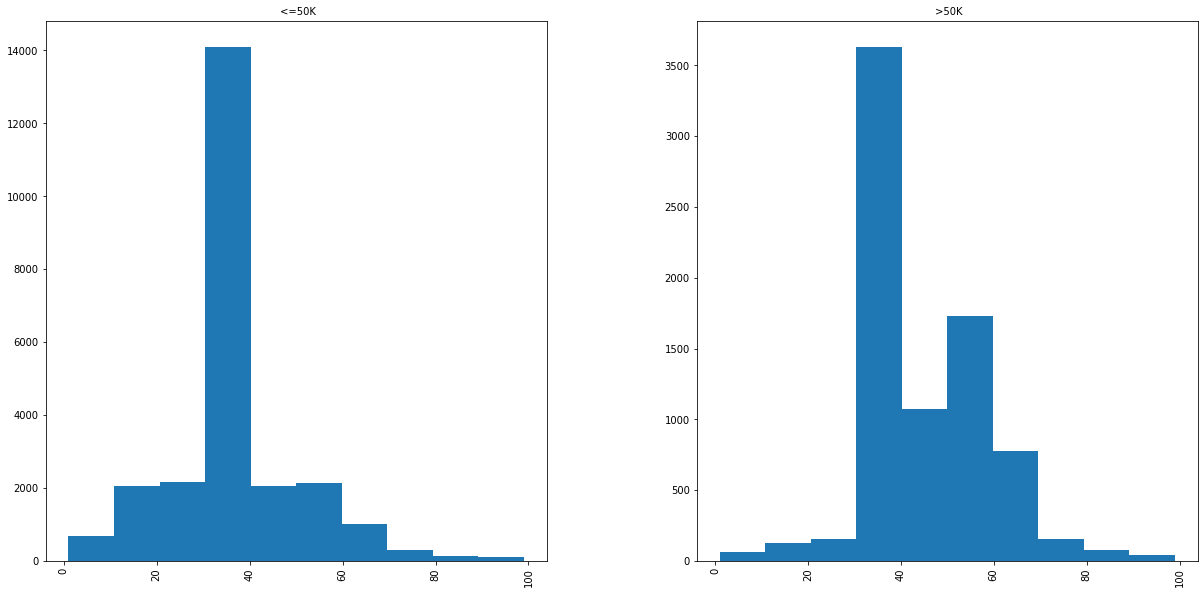

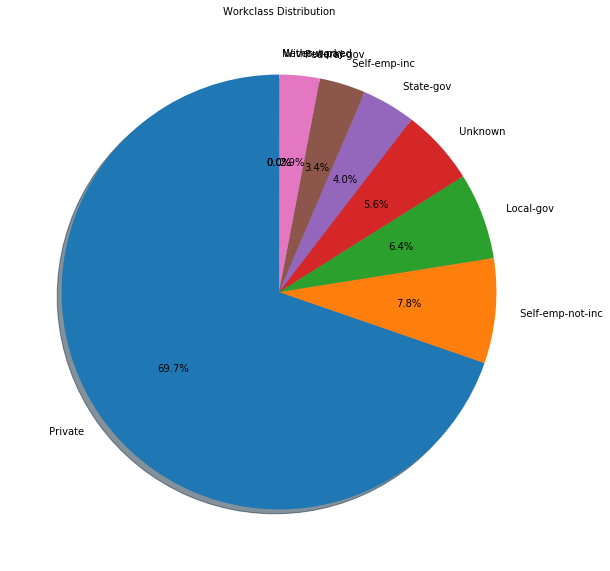

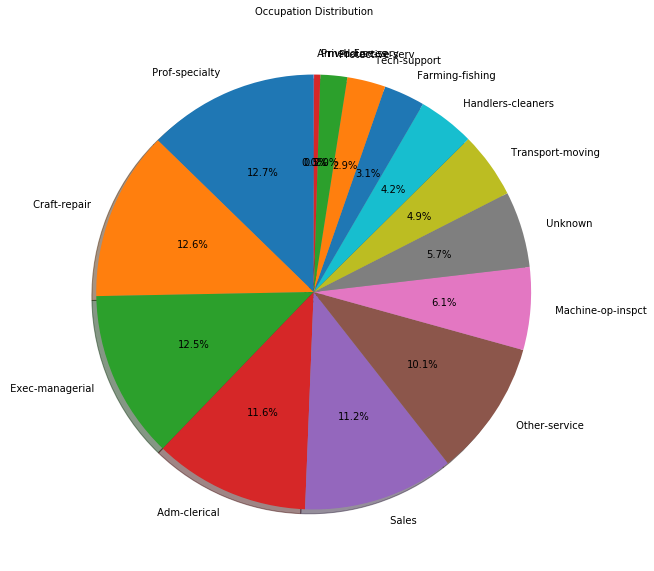

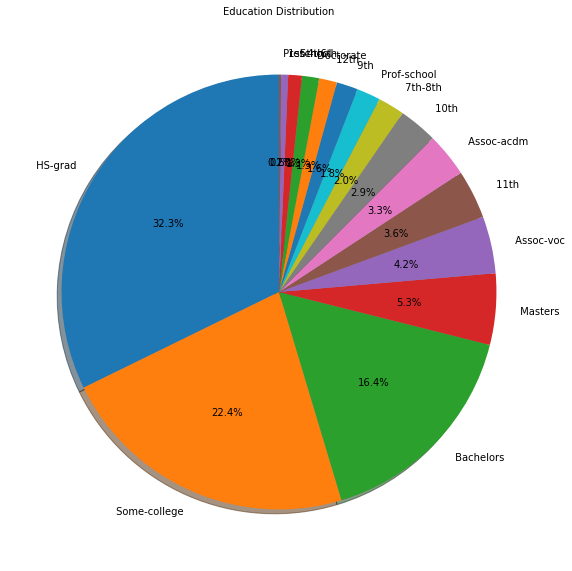

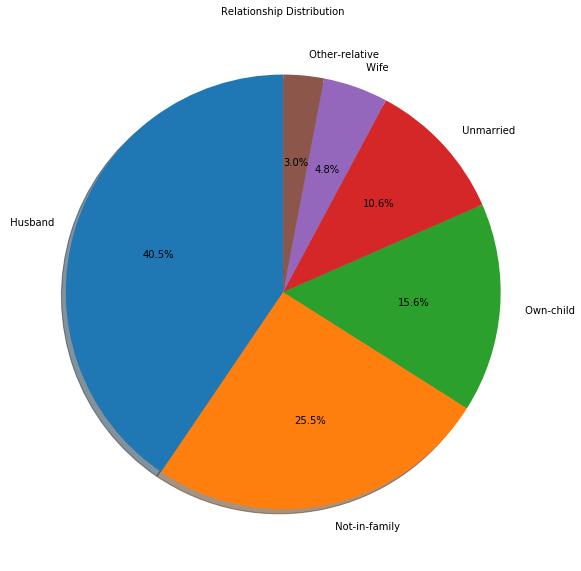

In [7]:
# Income density by age
dataset[['age', 'income']].hist(by='income', sharex=True)
plt.show()

# Income density by hours-per-week
dataset[['hours-per-week', 'income']].hist(by='income', sharex=True)
plt.show()

# Workclass Distribution
labels_wc = dataset['workclass'].value_counts().index
sizes_wc = []
for i in dataset['workclass'].value_counts().values:
    sizes_wc.append(i * 100 / sum(dataset['workclass'].value_counts().values))

plt.pie(sizes_wc, labels=labels_wc, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Workclass Distribution")
plt.show()

# Occupation Distribution
labels_oc = dataset['occupation'].value_counts().index
sizes_oc = []
for i in dataset['occupation'].value_counts().values:
    sizes_oc.append(i * 100 / sum(dataset['occupation'].value_counts().values))

plt.pie(sizes_oc, labels=labels_oc, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Occupation Distribution")
plt.show()

# Education Distribution
labels_ed = dataset['education'].value_counts().index
sizes_ed = []
for i in dataset['education'].value_counts().values:
    sizes_ed.append(i * 100 / sum(dataset['education'].value_counts().values))

plt.pie(sizes_ed, labels=labels_ed, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Education Distribution")
plt.show()

# Relationship Distribution
labels_re = dataset['relationship'].value_counts().index
sizes_re = []
for i in dataset['relationship'].value_counts().values:
    sizes_re.append(i * 100 / sum(dataset['relationship'].value_counts().values))

plt.pie(sizes_re, labels=labels_re, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Relationship Distribution")
plt.show()

## Feature Engineering

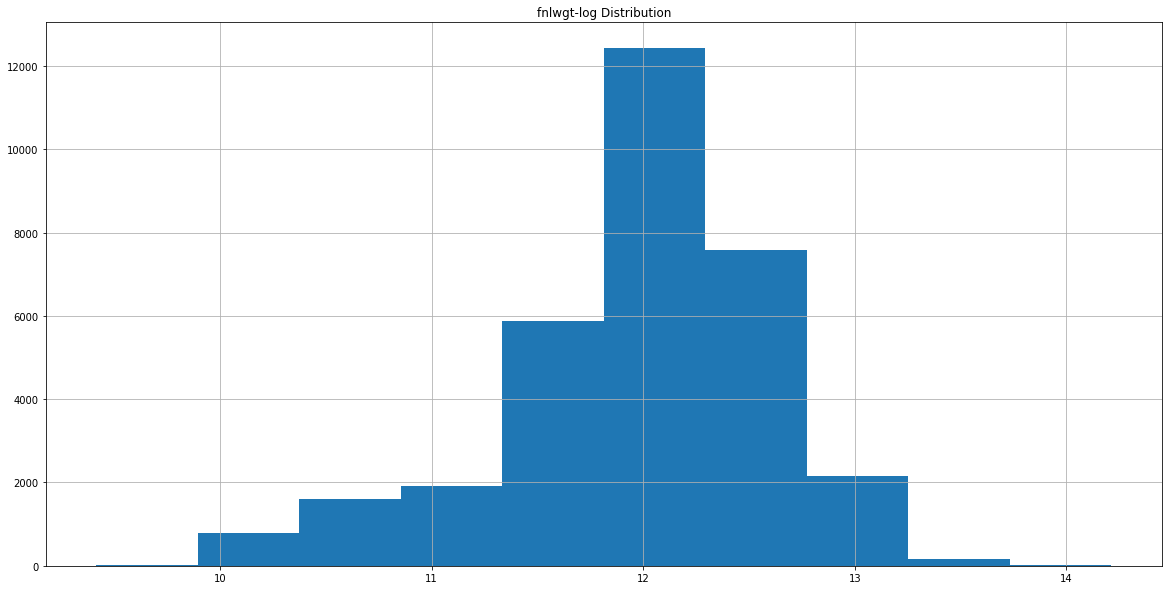

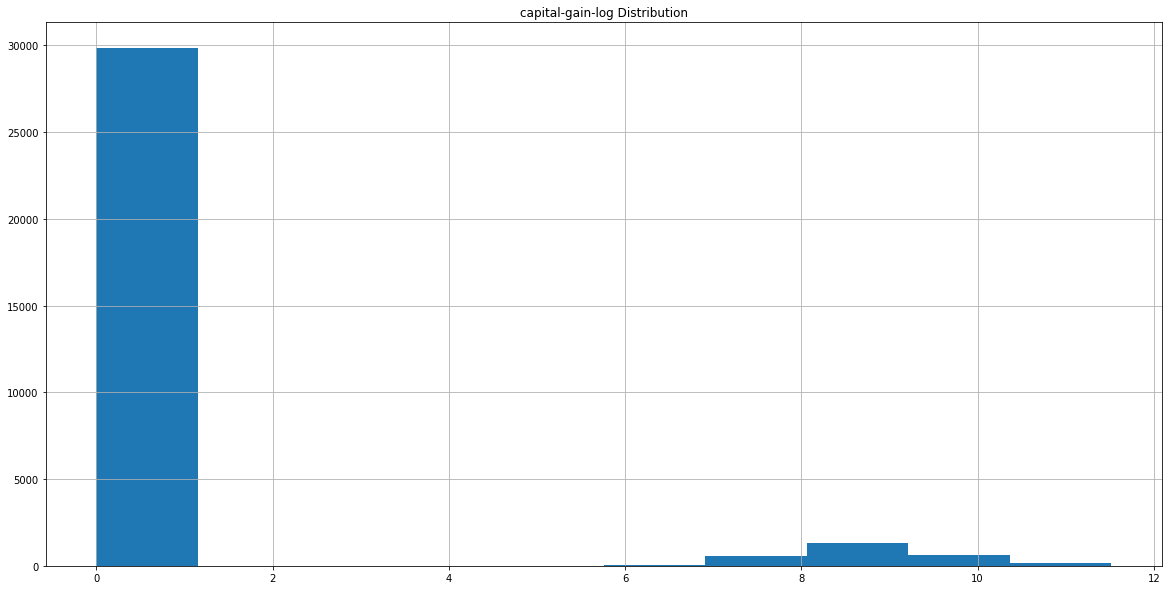

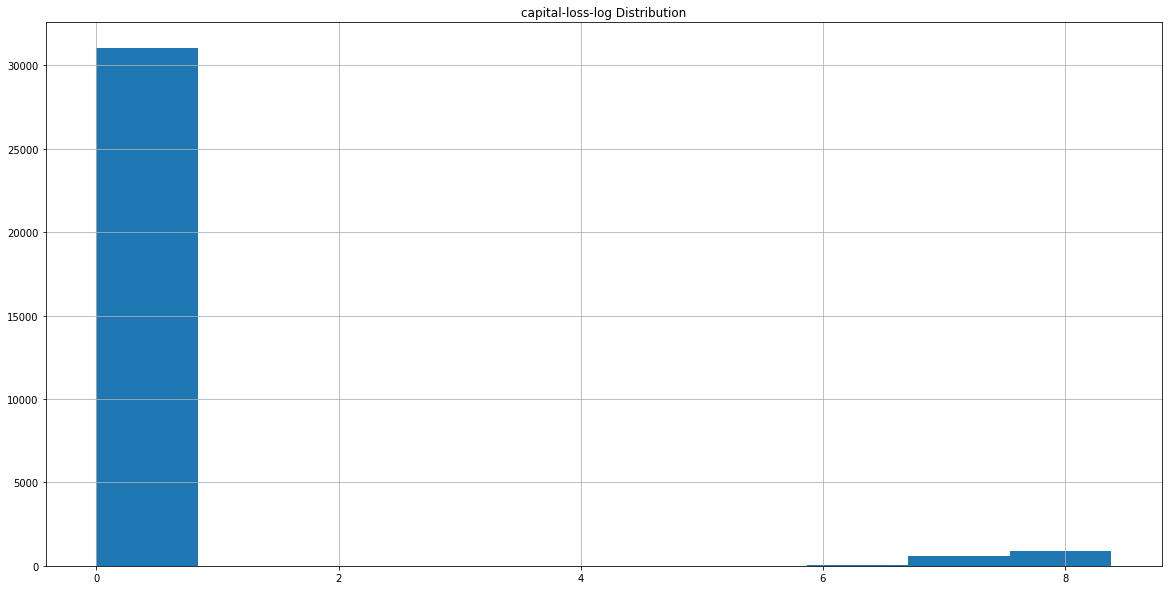

In [8]:
# 'fnlwgt' Log Transform
dataset['fnlwgt-log'] = np.log((1 + dataset['fnlwgt']))

fig, ax = plt.subplots()
dataset['fnlwgt-log'].hist()
ax.set_title('fnlwgt-log Distribution', fontsize=12)
plt.show()

# 'capital-gain' Log Transform
dataset['capital-gain-log'] = np.log((1 + dataset['capital-gain']))

fig, ax = plt.subplots()
dataset['capital-gain-log'].hist()
ax.set_title('capital-gain-log Distribution', fontsize=12)
plt.show()

# 'capital-loss' Log Transform
dataset['capital-loss-log'] = np.log((1 + dataset['capital-loss']))

fig, ax = plt.subplots()
dataset['capital-loss-log'].hist()
ax.set_title('capital-loss-log Distribution', fontsize=12)
plt.show()

In [9]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

# Scaler 'age'
scaler_age = MinMaxScaler()
dataset['age-scaler'] = scaler_age.fit_transform(dataset[['age']])

# Scaler 'education-num'
scaler_edu = MinMaxScaler()
dataset['education-num-scaler'] = scaler_edu.fit_transform(dataset[['education-num']])

# Scaler 'hours-per-week'
scaler_hpw = MinMaxScaler()
dataset['hours-per-week-scaler'] = scaler_hpw.fit_transform(dataset[['hours-per-week']])

# Scaler 'fnlwgt-log'
scaler_fnlwgt = MinMaxScaler()
dataset['fnlwgt-log-scaler'] = scaler_fnlwgt.fit_transform(dataset[['fnlwgt-log']])

# Scaler 'capital-gain-log'
scaler_capital_gain = MinMaxScaler()
dataset['capital-gain-log-scaler'] = scaler_capital_gain.fit_transform(
                                                dataset[['capital-gain-log']])

# Scaler 'capital-loss-log'
scaler_capital_loss = MinMaxScaler()
dataset['capital-loss-log-scaler'] = scaler_capital_loss.fit_transform(
                                                dataset[['capital-loss-log']])

In [10]:
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,income,fnlwgt-log,capital-gain-log,capital-loss-log,age-scaler,education-num-scaler,hours-per-week-scaler,fnlwgt-log-scaler,capital-gain-log-scaler,capital-loss-log-scaler
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,<=50K,11.258253,7.684784,0.0,0.301370,0.800000,0.397959,0.384197,0.667492,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,<=50K,11.330348,0.000000,0.0,0.452055,0.800000,0.122449,0.399234,0.000000,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,<=50K,12.281398,0.000000,0.0,0.287671,0.533333,0.397959,0.597596,0.000000,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,<=50K,12.366157,0.000000,0.0,0.493151,0.400000,0.397959,0.615275,0.000000,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,<=50K,12.732013,0.000000,0.0,0.150685,0.800000,0.397959,0.691582,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,<=50K,12.458010,0.000000,0.0,0.136986,0.733333,0.377551,0.634432,0.000000,0.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,>50K,11.947140,0.000000,0.0,0.315068,0.533333,0.397959,0.527879,0.000000,0.0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,<=50K,11.931050,0.000000,0.0,0.561644,0.533333,0.397959,0.524524,0.000000,0.0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,<=50K,12.213500,0.000000,0.0,0.068493,0.533333,0.193878,0.583435,0.000000,0.0


In [11]:
# Remove Duplicate features
dataset = dataset.drop(['age', 'fnlwgt', 'education-num', 'capital-gain',
                        'capital-loss', 'hours-per-week', 'fnlwgt-log',
                        'capital-gain-log', 'capital-loss-log'], axis=1)

In [12]:
# Encoding target field (feature 'income')
dataset = dataset.replace(' >50K', 1)
dataset = dataset.replace(' <=50K', 0)

# Setting features, targets
target = dataset['income']
feature = dataset.drop('income', axis=1)

# Dummy Coding
feature = pd.get_dummies(feature)

In [13]:
feature

,age-scaler,education-num-scaler,hours-per-week-scaler,fnlwgt-log-scaler,capital-gain-log-scaler,capital-loss-log-scaler,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Unknown,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.397959,0.384197,0.667492,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.452055,0.800000,0.122449,0.399234,0.000000,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.533333,0.397959,0.597596,0.000000,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.493151,0.400000,0.397959,0.615275,0.000000,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.150685,0.800000,0.397959,0.691582,0.000000,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0.377551,0.634432,0.000000,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32557,0.315068,0.533333,0.397959,0.527879,0.000000,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32558,0.561644,0.533333,0.397959,0.524524,0.000000,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32559,0.068493,0.533333,0.193878,0.583435,0.000000,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## Feature Selection

In [14]:
print('Feature set data [shape: '+str(feature.shape)+']')
print('Feature names:')
print(np.array(feature.columns), '\n')

Feature set data [shape: (32561, 108)]
Feature names:
['age-scaler' 'education-num-scaler' 'hours-per-week-scaler'
 'fnlwgt-log-scaler' 'capital-gain-log-scaler' 'capital-loss-log-scaler'
 'workclass_ Federal-gov' 'workclass_ Local-gov' 'workclass_ Never-worked'
 'workclass_ Private' 'workclass_ Self-emp-inc'
 'workclass_ Self-emp-not-inc' 'workclass_ State-gov' 'workclass_ Unknown'
 'workclass_ Without-pay' 'education_ 10th' 'education_ 11th'
 'education_ 12th' 'education_ 1st-4th' 'education_ 5th-6th'
 'education_ 7th-8th' 'education_ 9th' 'education_ Assoc-acdm'
 'education_ Assoc-voc' 'education_ Bachelors' 'education_ Doctorate'
 'education_ HS-grad' 'education_ Masters' 'education_ Preschool'
 'education_ Prof-school' 'education_ Some-college'
 'marital-status_ Divorced' 'marital-status_ Married-AF-spouse'
 'marital-status_ Married-civ-spouse'
 'marital-status_ Married-spouse-absent' 'marital-status_ Never-married'
 'marital-status_ Separated' 'marital-status_ Widowed'
 'occupati

In [16]:
from sklearn.feature_selection import chi2, SelectKBest

skb = SelectKBest(score_func=chi2, k = 70)
skb.fit(feature, target)

feature_scores = [(item, score) for item, score in zip(
                                feature.columns, skb.scores_)]   
sorted(feature_scores, key=lambda x: -x[1])[:70]

[('marital-status_ Married-civ-spouse', 3477.5158774537117),
 ('relationship_ Husband', 3114.94154602898),
 ('marital-status_ Never-married', 2218.5219765707857),
 ('capital-gain-log-scaler', 1943.6987563613152),
 ('relationship_ Own-child', 1435.873016044718),
 ('occupation_ Exec-managerial', 1315.4826322279757),
 ('sex_ Female', 1016.4474004749428),
 ('occupation_ Prof-specialty', 981.8350684684459),
 ('education_ Masters', 939.7752175976284),
 ('education_ Bachelors', 886.2351821367895),
 ('relationship_ Not-in-family', 861.8462180255367),
 ('education_ Prof-school', 767.5161468600892),
 ('occupation_ Other-service', 715.396117457468),
 ('workclass_ Self-emp-inc', 611.6341987833794),
 ('relationship_ Unmarried', 594.1846593436317),
 ('education_ Doctorate', 565.0119250157056),
 ('capital-loss-log-scaler', 554.861768087007),
 ('sex_ Male', 502.43941948212955),
 ('relationship_ Wife', 470.9045497134076),
 ('marital-status_ Divorced', 453.4794851751475),
 ('education_ HS-grad', 379.662

In [17]:
select_features_kbest = skb.get_support()
features_names_kbest = feature.columns[select_features_kbest]
features_selection = feature[features_names_kbest]

In [18]:
features_selection

,age-scaler,education-num-scaler,hours-per-week-scaler,capital-gain-log-scaler,capital-loss-log-scaler,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Guatemala,native-country_ India,native-country_ Iran,native-country_ Jamaica,native-country_ Japan,native-country_ Mexico,native-country_ Nicaragua,native-country_ Puerto-Rico,native-country_ Taiwan,native-country_ Vietnam
0,0.301370,0.800000,0.397959,0.667492,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.452055,0.800000,0.122449,0.000000,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.287671,0.533333,0.397959,0.000000,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.493151,0.400000,0.397959,0.000000,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.150685,0.800000,0.397959,0.000000,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0.377551,0.000000,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,0.315068,0.533333,0.397959,0.000000,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32558,0.561644,0.533333,0.397959,0.000000,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,0.068493,0.533333,0.193878,0.000000,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Setting Training set vs Test set

In [19]:
# Setting X, y
X = features_selection.values
y = target.values
X

array([[0.30136986, 0.8       , 0.39795918, ..., 0.        , 0.        ,
        0.        ],
       [0.45205479, 0.8       , 0.12244898, ..., 0.        , 0.        ,
        0.        ],
       [0.28767123, 0.53333333, 0.39795918, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.56164384, 0.53333333, 0.39795918, ..., 0.        , 0.        ,
        0.        ],
       [0.06849315, 0.53333333, 0.19387755, ..., 0.        , 0.        ,
        0.        ],
       [0.47945205, 0.53333333, 0.39795918, ..., 0.        , 0.        ,
        0.        ]])

## Dimensionality Reduction Model

### Dimensionality Reduction by PCA

In [20]:
# Dimensionality Reduction by PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_pca = pca.fit_transform(X)

# Find best value for n_components: d
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [21]:
cumsum

array([0.20010457, 0.28298197, 0.35387914, 0.41473792, 0.4717367 ,
       0.51920351, 0.56279608, 0.59696171, 0.62700976, 0.65390425,
       0.68021255, 0.70487023, 0.72684014, 0.74701959, 0.76549482,
       0.78206738, 0.79704778, 0.81044284, 0.82290208, 0.83422637,
       0.84521409, 0.85577378, 0.86611   , 0.8753253 , 0.88361689,
       0.89174704, 0.89954292, 0.90727056, 0.91485271, 0.92225272,
       0.92936006, 0.93570239, 0.94164873, 0.94729467, 0.95223339,
       0.95687482, 0.96132269, 0.96542482, 0.96920972, 0.97264141,
       0.9759862 , 0.97912877, 0.98191049, 0.9841345 , 0.98620928,
       0.98822054, 0.98964195, 0.99085283, 0.99198221, 0.99292964,
       0.99372064, 0.99449293, 0.99521601, 0.99586732, 0.99643083,
       0.99691533, 0.99737147, 0.99780708, 0.99822614, 0.99864205,
       0.99905533, 0.99938051, 0.99968502, 0.9999262 , 0.99995518,
       0.99998076, 0.99999393, 1.        , 1.        , 1.        ])

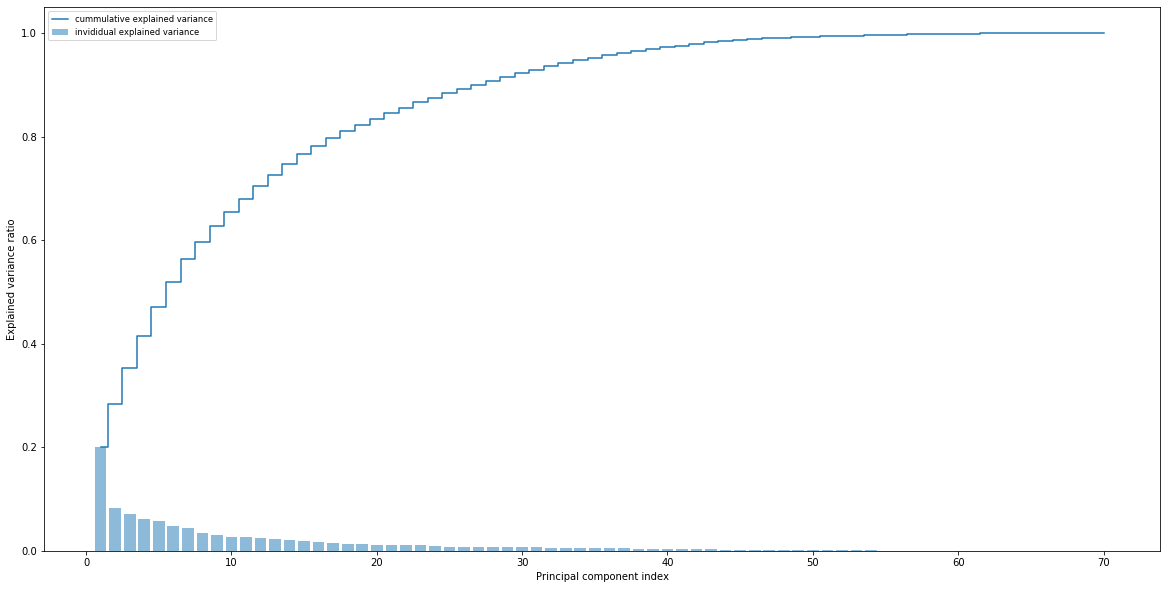

In [22]:
plt.figure(figsize=(20,10))
plt.bar(range(1, 71), pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='invididual explained variance')
plt.step(range(1, 71), cumsum, where='mid',
         label='cummulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [23]:
d = np.argmax(cumsum >= 0.8) + 1

# Rebuilding a model with best parameters
pca = PCA(n_components=d)
X_pca = pca.fit_transform(X)

In [24]:
X_pca

array([[ 0.46913388, -0.64590824,  0.87833925, ..., -0.16529585,
        -0.15128107,  0.05712674],
       [-1.20227471,  0.27852818,  0.79853831, ...,  0.53768785,
        -0.13798513, -0.11523722],
       [ 0.29165089, -0.35637239, -0.7630413 , ...,  0.04887415,
         0.08087486,  0.2815498 ],
       ...,
       [ 0.91164095,  0.95097691, -0.91797949, ..., -0.05506142,
        -0.24611348,  0.05316613],
       [ 0.51153859, -1.0246532 , -0.72988011, ..., -0.08480887,
        -0.25270456,  0.0928051 ],
       [ 0.07173307,  1.27690304, -0.23954926, ..., -0.01196022,
         0.14304321,  0.75725652]])

In [25]:
# Principal component
principal_component = pca.components_

In [26]:
principal_component

array([[-6.72006930e-02, -1.52305558e-02, -3.79345592e-02, ...,
         8.33717296e-04, -1.69418183e-04,  4.90526761e-04],
       [ 1.27170955e-01,  2.64203554e-02,  3.00922618e-03, ...,
         1.49422682e-03,  1.51018891e-04, -6.47799773e-04],
       [ 8.72846252e-03,  1.43491305e-01,  5.06098303e-03, ...,
        -1.63605617e-03,  2.07265813e-03, -2.49303874e-04],
       ...,
       [-1.25741561e-02, -5.45051061e-02,  2.02578967e-02, ...,
         2.45786369e-03, -6.11244714e-04,  2.22645180e-03],
       [-5.89069559e-02, -1.40990665e-01,  1.03092409e-02, ...,
         4.81820817e-03, -4.22273719e-03,  3.27240043e-05],
       [-2.28480396e-02, -5.56513512e-03, -7.95259797e-03, ...,
         3.29808946e-03,  1.04368899e-03,  1.35570615e-03]])

<Figure size 1440x720 with 0 Axes>

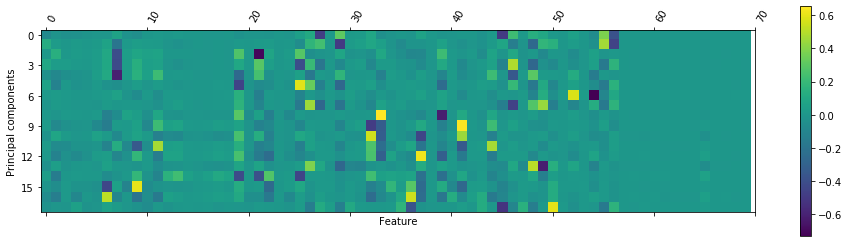

In [27]:
plt.figure(figsize=(20,10))
plt.matshow(pca.components_, cmap='viridis')
plt.yticks(range(0, d, 3))
plt.colorbar()
plt.xticks(range(0, 71, 10), rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

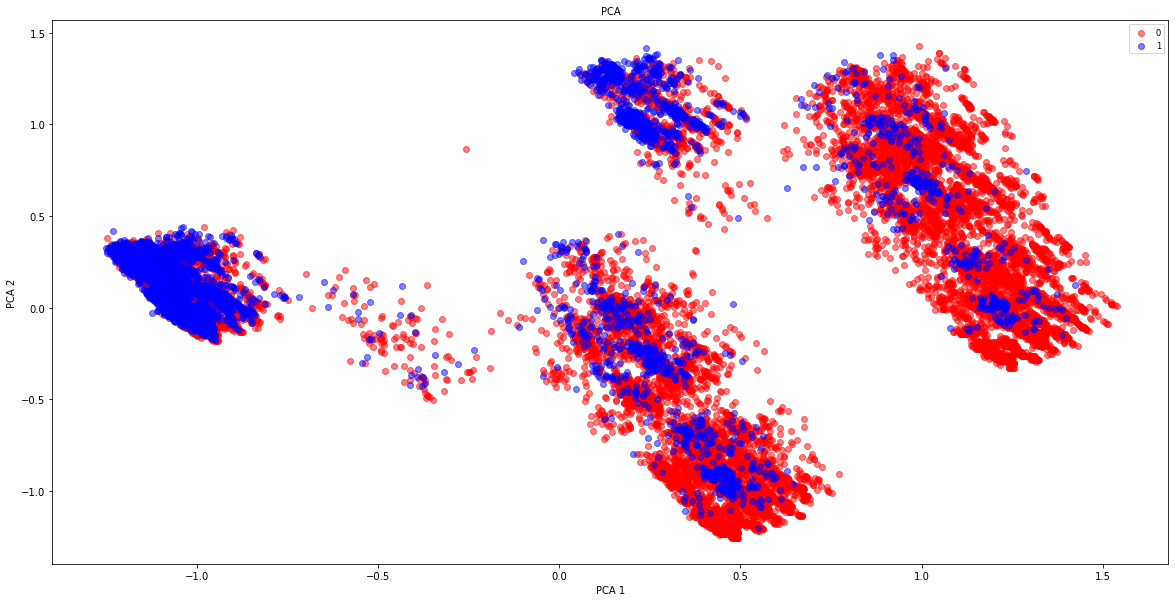

In [28]:
# Visualizing results
plt.figure(figsize=(20,10))

plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.5,label='1')

plt.title("PCA")
plt.ylabel('PCA 2')
plt.xlabel('PCA 1')
plt.legend()
plt.show()

### Dimensionality Reduction by t-SNE

In [29]:
# Dimensionality Reduction by t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X)

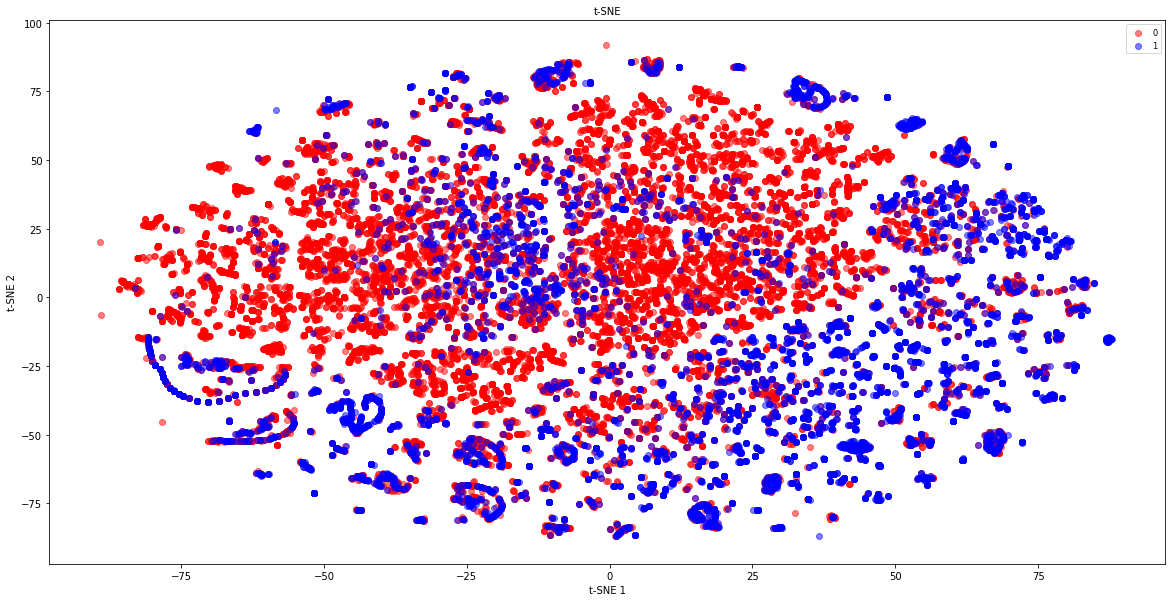

In [30]:
# Visualizing results
plt.figure(figsize=(20,10))

plt.scatter(X_tsne[y==0, 0], X_tsne[y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(X_tsne[y==1, 0], X_tsne[y==1, 1], color='blue', alpha=0.5,label='1')

plt.title("t-SNE")
plt.ylabel('t-SNE 2')
plt.xlabel('t-SNE 1')
plt.legend()
plt.show()

### Dimensionality Reduction by GRP

In [31]:
# Dimensionality Reduction by GRP
from sklearn.random_projection import GaussianRandomProjection

grp = GaussianRandomProjection(n_components=18,eps = 0.5, random_state=42)
X_grp = grp.fit_transform(X)

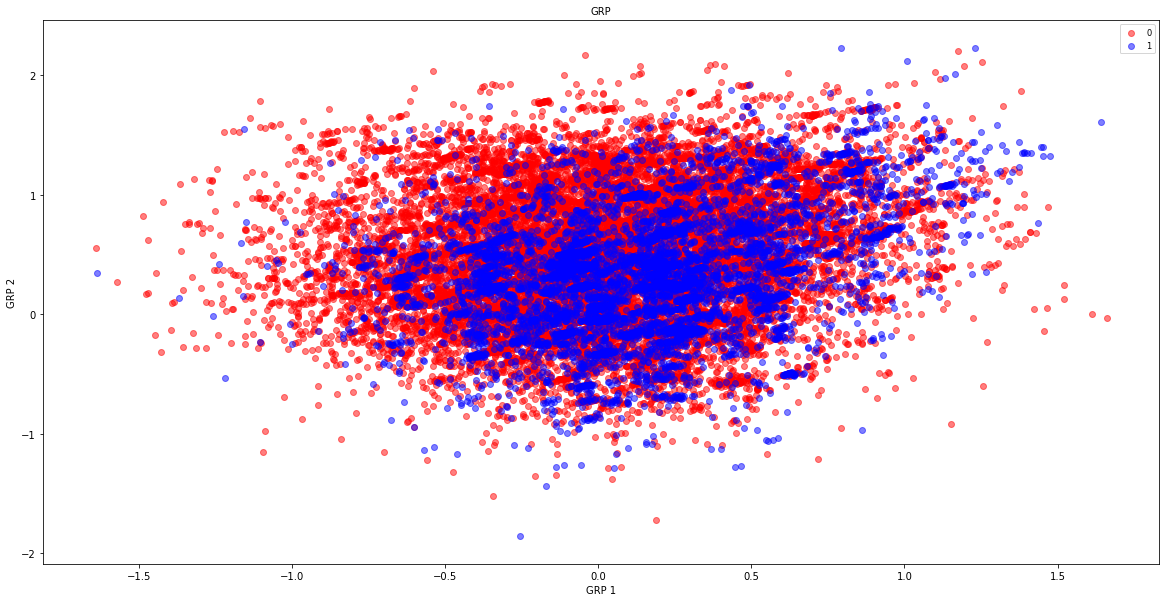

In [32]:
# Visualizing results
plt.figure(figsize=(20,10))

plt.scatter(X_grp[y==0, 0], X_grp[y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(X_grp[y==1, 0], X_grp[y==1, 1], color='blue', alpha=0.5,label='1')

plt.title("GRP")
plt.ylabel('GRP 2')
plt.xlabel('GRP 1')
plt.legend()
plt.show()